In [1]:
# 寻找信号峰值 参见https://blog.csdn.net/chehec2010/article/details/117336967
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks
import numpy as np
%matplotlib ipympl

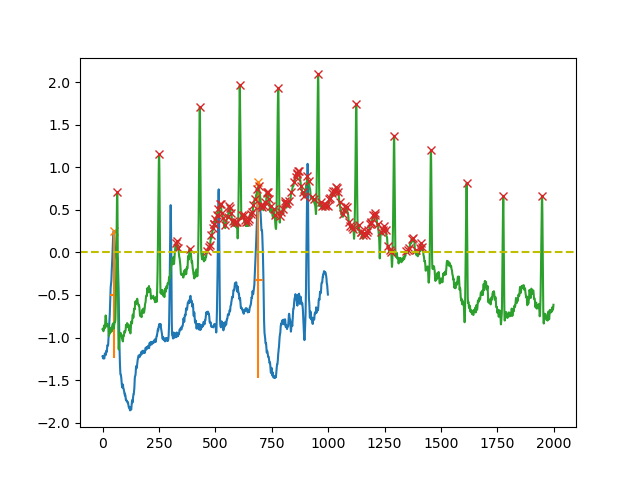

In [7]:
# 寻找大于0的峰值
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, height=0)
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.axhline(y=0,ls="--",c="y")   
plt.show()


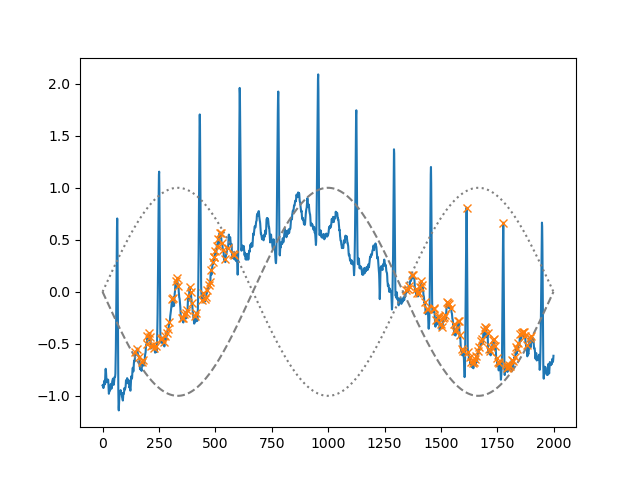

In [8]:
plt.close()
#查找制定范围内的峰值
x = electrocardiogram()[2000:4000]
border = np.sin(np.linspace(0, 3 * np.pi, x.size))
peaks, _ = find_peaks(x, height=(-border, border))
plt.plot(x)
plt.plot(-border,"--",color="gray")
plt.plot(border, ":", color="gray")
plt.plot(peaks, x[peaks], "x")
plt.show()

#如何写边界之外的数据呢？

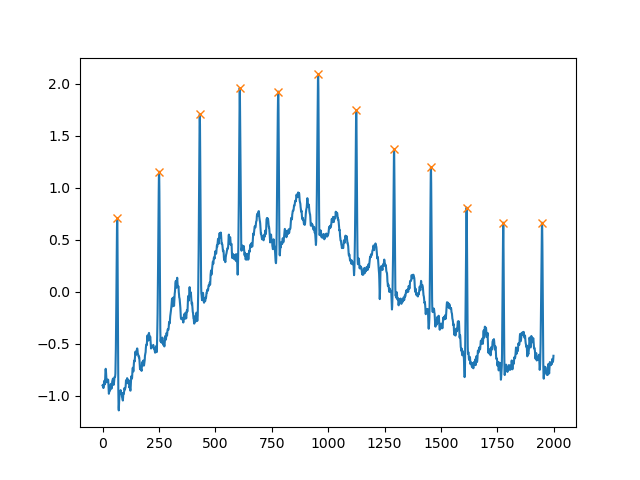

In [4]:
plt.close()
# 两个峰值点至少相隔 150个样本点
x = electrocardiogram()[2000:4000]
peaks, _ = find_peaks(x, distance=150)
plt.plot(x)
plt.plot(peaks, x[peaks],"x")
plt.show()

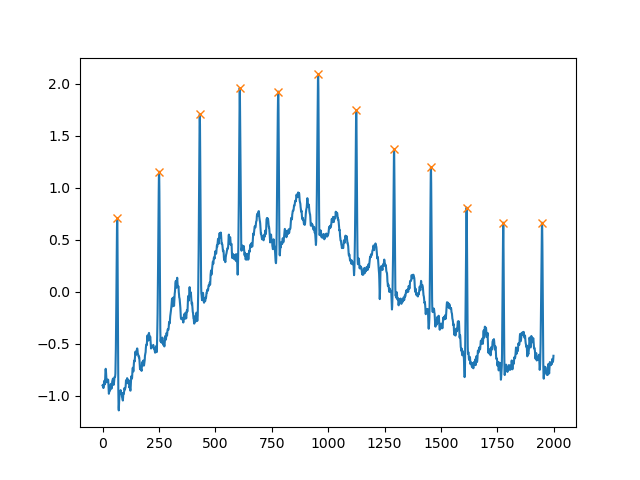

In [9]:
plt.close()
#将允许突出限制在0.6～3 也可以筛选出所有的峰值
x = electrocardiogram()[2000:4000]
peaks, properties = find_peaks(x, prominence=(0.6, 3))
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.show()

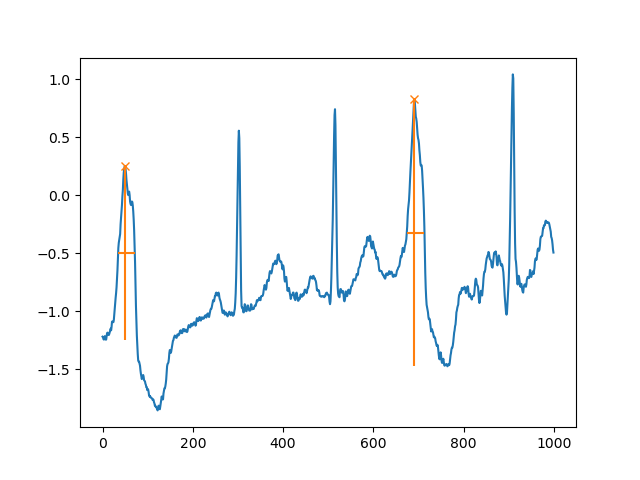

In [10]:
plt.close()
#选择非典型性心跳：最小突出1 和至少 20 个样本宽度
x = electrocardiogram()[17000:18000]
peaks, properties = find_peaks(x, prominence=1, width=20)

plt.plot(x)
plt.plot(peaks,x[peaks], "x")
plt.vlines(x=peaks, ymin=x[peaks] - properties["prominences"],
        ymax=x[peaks], colors="C1")
plt.hlines(y=properties["width_heights"], xmin=properties["left_ips"],
    xmax=properties["right_ips"], color="C1")
plt.show()